# init

## import package

In [1]:
import os
import time
from subprocess import  call
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
from matplotlib.colors import ListedColormap
import scipy.sparse as sparse
import importlib
import copy
import gc
import datetime
from scipy.stats import zscore
import sys
import scipy.stats as st
import math
from scipy import optimize
from tqdm.notebook import tqdm
from scipy.spatial.distance import pdist, squareform
import scanpy as sc

## import function

In [2]:
src_dir=r"/Path/to/ImputeHiFI/src"
sys.path.append(src_dir)
from function_basic import basic_function as basic

import ImputeHiFI_Algorithm as ImputeHiFI
import ImputeHiFI_Algorithm_no_HiC as ImputeHiFI_no_HiC

<module 'image_project.function_basic' from '/mnt/disk1/scfan/program/image_project/function_basic.py'>

v5 similar FISH


## path

In [4]:
data_dir=r"/mnt/disk1/scfan/data/Cai_21_Nature"

# prepare data

## load data_pkl

In [45]:
data_pkl_path=os.path.join(data_dir,"DNA_25kb",r"align_name_with_RNA_data.pkl")
data=basic.load_variable_from_pikle_file(data_pkl_path)

In [46]:
current_probe_data_dir=r"/mnt/disk1/scfan/data/Cai_21_Nature/DNA_25kb"

In [47]:
first_seen_probe_data_dir=r"/mnt/disk1/scfan/data/Cai_21_Nature/DNA_25kb/Impute/"
basic.recursive_mkdir(first_seen_probe_data_dir)

In [89]:
RNA_FISH_adata_path=os.path.join(data_dir, 'RNA', 'RNA_adata.h5ad')
RNA_FISH_adata=sc.read(RNA_FISH_adata_path)

In [49]:
ImputeHiFI_data_dir=os.path.join(first_seen_probe_data_dir,'ImputeHiFI')
basic.recursive_mkdir(ImputeHiFI_data_dir)

## generate max_not_missing_data

In [10]:
data.keys()

dict_keys(['chrom_ids', 'region_names', 'start_position', 'end_position', 'mid_position', 'mid_position_Mb', 'dna_zxys', 'chrom_name', 'gene_ID', 'cluster_label', 'cluster_label_name'])

In [50]:
chrom_ids_to_index_dict = {}
cell_name_list=[]
for index, chrom_ids in enumerate(data['chrom_ids']):
    chrom_ids_to_index_dict[str(chrom_ids)] = index
    cell_name_list.append(str(chrom_ids))
cell_name_array=np.array(cell_name_list)
chrom_index_to_ids_dict = {index: chrom_id for chrom_id, index in chrom_ids_to_index_dict.items()}
chr_name_list = data['chrom_name'][0:20]    

In [12]:
data['gene_ID']

[['chr1-HighRes-#1',
  'chr1-HighRes-#2',
  'chr1-HighRes-#3',
  'chr1-HighRes-#4',
  'chr1-HighRes-#5',
  'chr1-HighRes-#6',
  'chr1-HighRes-#7',
  'chr1-HighRes-#8',
  'chr1-HighRes-#9',
  'chr1-HighRes-#10',
  'chr1-HighRes-#11',
  'chr1-HighRes-#12',
  'chr1-HighRes-#13',
  'chr1-HighRes-#14',
  'chr1-HighRes-#15',
  'chr1-HighRes-#16',
  'chr1-HighRes-#17',
  'chr1-HighRes-#18',
  'chr1-HighRes-#19',
  'chr1-HighRes-#20',
  'chr1-HighRes-#21',
  'chr1-HighRes-#22',
  'chr1-HighRes-#23',
  'chr1-HighRes-#24',
  'chr1-HighRes-#25',
  'chr1-HighRes-#26',
  'chr1-HighRes-#27',
  'chr1-HighRes-#28',
  'chr1-HighRes-#29',
  'chr1-HighRes-#30',
  'chr1-HighRes-#31',
  'chr1-HighRes-#32',
  'chr1-HighRes-#33',
  'chr1-HighRes-#34',
  'chr1-HighRes-#35',
  'chr1-HighRes-#36',
  'chr1-HighRes-#37',
  'chr1-HighRes-#38',
  'chr1-HighRes-#39',
  'chr1-HighRes-#40',
  'chr1-HighRes-#41',
  'chr1-HighRes-#42',
  'chr1-HighRes-#43',
  'chr1-HighRes-#44',
  'chr1-HighRes-#45',
  'chr1-HighRes-#46

In [13]:
chrom_ids_to_index_dict

{'0_3_1_rep1': 0,
 '0_3_2_rep1': 1,
 '0_3_3_rep1': 2,
 '0_3_4_rep1': 3,
 '0_3_5_rep1': 4,
 '0_3_6_rep1': 5,
 '0_3_7_rep1': 6,
 '0_3_8_rep1': 7,
 '0_3_9_rep1': 8,
 '0_3_10_rep1': 9,
 '0_3_11_rep1': 10,
 '0_3_12_rep1': 11,
 '0_3_13_rep1': 12,
 '0_3_14_rep1': 13,
 '0_3_15_rep1': 14,
 '0_3_16_rep1': 15,
 '0_3_17_rep1': 16,
 '0_3_18_rep1': 17,
 '0_3_19_rep1': 18,
 '0_3_20_rep1': 19,
 '0_3_21_rep1': 20,
 '0_3_22_rep1': 21,
 '0_3_23_rep1': 22,
 '0_3_24_rep1': 23,
 '0_3_25_rep1': 24,
 '0_3_26_rep1': 25,
 '0_3_27_rep1': 26,
 '0_3_28_rep1': 27,
 '0_3_29_rep1': 28,
 '0_3_30_rep1': 29,
 '0_3_31_rep1': 30,
 '0_3_32_rep1': 31,
 '0_3_33_rep1': 32,
 '0_3_34_rep1': 33,
 '0_3_35_rep1': 34,
 '0_3_36_rep1': 35,
 '0_3_37_rep1': 36,
 '0_3_38_rep1': 37,
 '0_3_39_rep1': 38,
 '0_3_40_rep1': 39,
 '0_3_41_rep1': 40,
 '0_3_42_rep1': 41,
 '0_3_43_rep1': 42,
 '0_3_44_rep1': 43,
 '0_3_45_rep1': 44,
 '0_3_46_rep1': 45,
 '1_3_1_rep1': 46,
 '1_3_2_rep1': 47,
 '1_3_3_rep1': 48,
 '1_3_4_rep1': 49,
 '1_3_5_rep1': 50,
 '1_

In [14]:
all_cell_dna_list=data['dna_zxys']

In [15]:
num_cells = len(chrom_ids_to_index_dict)
num_chromosomes = len(chr_name_list)

len_num = 60

# 初始化结构，每个cell有一个列表，列表中有num_chromosomes个元素
max_all_cell_dna_list = [[] for _ in range(num_cells)]
min_all_cell_dna_list = [[] for _ in range(num_cells)]
max_all_cell_dna_list_not_missing_rate = [[] for _ in range(num_cells)]
min_all_cell_dna_list_not_missing_rate = [[] for _ in range(num_cells)]
choice_list = [[] for _ in range(num_cells)]  # 新增列表用于记录选择的是0还是1

# 遍历每个cell和其对应的染色体
for cell_index, (one_cell_name, one_cell_ids) in enumerate(chrom_ids_to_index_dict.items()):
    for chr_ids, chr_name in enumerate(chr_name_list):
        # 计算非缺失率
        not_nan_sum_0 = np.sum(~np.isnan(all_cell_dna_list[one_cell_ids][chr_ids][0])[:, 0])
        not_nan_sum_1 = np.sum(~np.isnan(all_cell_dna_list[one_cell_ids][chr_ids][1])[:, 0])
        not_missing_rate_0 = not_nan_sum_0 / len_num
        not_missing_rate_1 = not_nan_sum_1 / len_num

        # 根据非缺失率将数据存储到max或min列表中，并记录选择
        if not_missing_rate_0 > not_missing_rate_1:
            max_all_cell_dna_list[cell_index].append(all_cell_dna_list[one_cell_ids][chr_ids][0])
            max_all_cell_dna_list_not_missing_rate[cell_index].append(not_missing_rate_0)
            min_all_cell_dna_list[cell_index].append(all_cell_dna_list[one_cell_ids][chr_ids][1])
            min_all_cell_dna_list_not_missing_rate[cell_index].append(not_missing_rate_1)
            choice_list[cell_index].append(0)
        else:
            max_all_cell_dna_list[cell_index].append(all_cell_dna_list[one_cell_ids][chr_ids][1])
            max_all_cell_dna_list_not_missing_rate[cell_index].append(not_missing_rate_1)
            min_all_cell_dna_list[cell_index].append(all_cell_dna_list[one_cell_ids][chr_ids][0])
            min_all_cell_dna_list_not_missing_rate[cell_index].append(not_missing_rate_0)
            choice_list[cell_index].append(1)


### store have_max_min_info_data

In [51]:
import copy

# 创建data的深拷贝
have_max_min_info_data = copy.deepcopy(data)

# 将计算出来的信息添加到have_max_min_info_data字典中
have_max_min_info_data['max_all_cell_dna_list'] = max_all_cell_dna_list
have_max_min_info_data['min_all_cell_dna_list'] = min_all_cell_dna_list
have_max_min_info_data['max_all_cell_dna_list_not_missing_rate'] = max_all_cell_dna_list_not_missing_rate
have_max_min_info_data['min_all_cell_dna_list_not_missing_rate'] = min_all_cell_dna_list_not_missing_rate
have_max_min_info_data['choice_list'] = choice_list

# 现在have_max_min_info_data包含了原始数据以及新计算出来的信息
temp_path=os.path.join(current_probe_data_dir,r"have_max_min_info_data.pkl")
basic.store_variable_from_pikle_file(temp_path,have_max_min_info_data)

## generate first seen probe data

In [52]:
first_seen_probe_data=copy.deepcopy(data)

In [53]:
first_seen_probe_data['all_cell_dna_list']=max_all_cell_dna_list

In [54]:
first_seen_probe_data['chrom_ids_to_index_dict']=chrom_ids_to_index_dict

first_seen_probe_data['chrom_index_to_ids_dict']=chrom_index_to_ids_dict
first_seen_probe_data['chr_name_list']=chr_name_list
first_seen_probe_data['cell_name_array']=cell_name_array
first_seen_probe_data['cell_name_list']=cell_name_list

### each_chr_missing_rate_df

In [55]:
from tqdm import tqdm

# 初始化存储结果的列表
result_list = []

# 使用tqdm库来显示进度条
for cell_index, (one_cell_name, one_cell_ids) in tqdm(enumerate(chrom_ids_to_index_dict.items())):
    for chr_index, chr_name in enumerate(chr_name_list):
        # 获取当前cell和染色体的DNA数据
        dna_data = max_all_cell_dna_list[cell_index][chr_index]
        
        # 计算总探针数量和NaN探针数量
        total_probe_number = len(dna_data)
        nan_probe_number = np.sum(np.isnan(dna_data)[:,0])
        
        # 计算缺失率
        missing_rate = nan_probe_number / total_probe_number if total_probe_number else np.nan
        
        # 将结果存储到列表中
        result_list.append({
            'cell_name': one_cell_name,
            'chr_name': chr_name,
            'total_probe_number': total_probe_number,
            'nan_probe_number': nan_probe_number,
            'missing_rate': missing_rate
        })

df_columns = ['cell_name', 'chr_name', 'total_probe_number', 'nan_probe_number', 'missing_rate']
each_chr_missing_rate_df = pd.DataFrame(result_list, columns=df_columns)


1143it [00:00, 7138.98it/s]


In [56]:
each_chr_missing_rate_df

,cell_name,chr_name,total_probe_number,nan_probe_number,missing_rate
0,0_3_1_rep1,chr1,60,19,0.316667
1,0_3_1_rep1,chr2,60,16,0.266667
2,0_3_1_rep1,chr3,60,16,0.266667
3,0_3_1_rep1,chr4,60,16,0.266667
4,0_3_1_rep1,chr5,60,10,0.166667
...,...,...,...,...,...
22855,7_3_79_48hr,chr16,60,29,0.483333
22856,7_3_79_48hr,chr17,60,21,0.350000
22857,7_3_79_48hr,chr18,60,21,0.350000
22858,7_3_79_48hr,chr19,60,15,0.250000


In [57]:
missing_rate_df = each_chr_missing_rate_df.set_index(['cell_name', 'chr_name'])

In [58]:
first_seen_probe_data['each_chr_missing_rate_df']=each_chr_missing_rate_df
first_seen_probe_data['missing_rate_df']=missing_rate_df

### generate chr_bin_len_dict

In [59]:
chr_bin_length_dic={}
for chr_name in chr_name_list:
    chr_bin_length_dic[chr_name]=len_num
first_seen_probe_data['chr_bin_length_dic']=chr_bin_length_dic

### generate cell_num

In [70]:
cell_number=len(first_seen_probe_data['chrom_ids'])

In [34]:
cell_number

1143

In [71]:
first_seen_probe_data['cell_number']=cell_number

### generate cell type df

In [61]:
cluster_label_list=first_seen_probe_data['cluster_label']
cluster_label_name_dict=first_seen_probe_data['cluster_label_name']

In [62]:
result_list=[]
for cell_index, label_idx in enumerate(cluster_label_list):
    one_cell_name=chrom_index_to_ids_dict[cell_index]
    cell_type=cluster_label_name_dict[label_idx]
    result_list.append({
    'cell_name': one_cell_name,
    'cell_type': cell_type,
})
cell_type_df=pd.DataFrame(result_list)

In [63]:
cell_type_df.index=cell_type_df['cell_name']

In [64]:
first_seen_probe_data['cell_type_df']=cell_type_df

In [65]:
adata_obs_df=cell_type_df
first_seen_probe_data['adata_obs_df']=adata_obs_df

### generate spatial distance h5ad

In [66]:
spaital_dist_suffix='spatial_dist'
prxoimtiy_score_suffix='proximity_score'
first_seen_probe_data['spaital_dist_suffix']=spaital_dist_suffix
first_seen_probe_data['prxoimtiy_score_suffix']=prxoimtiy_score_suffix

In [67]:
importlib.reload(ImputeHiFI)

v5 similar FISH


<module 'ImputeHiFI_Algorithm_v5' from '/mnt/disk1/scfan/program/image_project/Cai_21_bioRxiv_Process/ImputHiFi/ImputeHiFI_Algorithm_v5.py'>

In [96]:
first_seen_probe_data_path=os.path.join(first_seen_probe_data_dir,'first_seen_probe_data.pkl')
basic.store_variable_from_pikle_file(first_seen_probe_data_path,first_seen_probe_data)

In [ ]:
first_seen_probe_data_path=os.path.join(first_seen_probe_data_dir,'first_seen_probe_data.pkl')
first_seen_probe_data=basic.load_variable_from_pikle_file(first_seen_probe_data_path)

In [72]:
chr_name_list=first_seen_probe_data['chr_name_list']
cell_number=first_seen_probe_data['cell_number']
all_cell_dna_list=first_seen_probe_data['all_cell_dna_list']
chr_bin_length_dic=first_seen_probe_data['chr_bin_length_dic']
chrom_index_to_ids_dict=first_seen_probe_data['chrom_index_to_ids_dict']
adata_obs_df=first_seen_probe_data['adata_obs_df']
spaital_dist_suffix=first_seen_probe_data['spaital_dist_suffix']
prxoimtiy_score_suffix=first_seen_probe_data['prxoimtiy_score_suffix']

In [73]:
store_path=os.path.join(first_seen_probe_data_dir,f'first_seen_probe_data_{spaital_dist_suffix}.h5ad')

In [74]:
ImputeHiFI.generate_spatial_distance_h5ad.generate_spatial_h5ad(chr_name_list,cell_number,all_cell_dna_list,
                              chr_bin_length_dic,chrom_index_to_ids_dict,adata_obs_df,store_path,)

chr1


100%|██████████| 1143/1143 [00:00<00:00, 25512.96it/s]


chr1


  2%|▏         | 28/1143 [00:00<00:08, 133.47it/s]

chr2


100%|██████████| 1143/1143 [00:00<00:00, 26805.83it/s]


chr2


  2%|▏         | 28/1143 [00:00<00:08, 131.75it/s]

chr3


  7%|▋         | 84/1143 [00:00<00:08, 130.52it/s]

chr3


  2%|▏         | 28/1143 [00:00<00:08, 130.52it/s]

chr4


100%|██████████| 1143/1143 [00:00<00:00, 26482.00it/s]


chr4


  2%|▏         | 26/1143 [00:00<00:09, 119.83it/s]

chr5


  3%|▎         | 38/1143 [00:00<00:09, 117.00it/s]

chr5


 11%|█▏        | 131/1143 [00:01<00:17, 59.01it/s]

chr6


100%|██████████| 1143/1143 [00:00<00:00, 23866.27it/s]


chr6


 13%|█▎        | 153/1143 [00:01<00:17, 56.72it/s]

chr7


100%|██████████| 1143/1143 [00:00<00:00, 25933.34it/s]


chr7


 15%|█▌        | 172/1143 [00:02<00:17, 56.09it/s]

chr8


 14%|█▍        | 158/1143 [00:02<00:17, 57.15it/s]

chr8


  7%|▋         | 84/1143 [00:00<00:07, 134.12it/s]

chr9


100%|██████████| 1143/1143 [00:00<00:00, 25107.70it/s]


chr9


 17%|█▋        | 195/1143 [00:02<00:17, 55.71it/s]

chr10


 12%|█▏        | 141/1143 [00:01<00:17, 57.85it/s]

chr10


 11%|█         | 123/1143 [00:01<00:15, 64.95it/s]

chr11


100%|██████████| 1143/1143 [00:00<00:00, 24606.78it/s]


chr11


 19%|█▉        | 215/1143 [00:03<00:16, 55.40it/s]

chr12


 22%|██▏       | 256/1143 [00:03<00:15, 55.76it/s]

chr12


 24%|██▍       | 274/1143 [00:04<00:15, 57.75it/s]

chr13


 23%|██▎       | 261/1143 [00:03<00:15, 57.86it/s]

chr13


  7%|▋         | 77/1143 [00:00<00:08, 121.29it/s]

chr14


 21%|██        | 242/1143 [00:03<00:15, 57.96it/s]

chr14


 16%|█▌        | 178/1143 [00:02<00:18, 52.92it/s]

chr15

 26%|██▌       | 297/1143 [00:04<00:14, 57.81it/s]

  3%|▎         | 38/1143 [00:00<00:09, 119.62it/s]

chr15


 26%|██▌       | 293/1143 [00:04<00:20, 40.75it/s]

chr16

 21%|██        | 237/1143 [00:03<00:23, 39.21it/s]

 16%|█▌        | 178/1143 [00:02<00:24, 40.16it/s]

chr16


  3%|▎         | 38/1143 [00:00<00:09, 116.87it/s]

chr17

 12%|█▏        | 133/1143 [00:01<00:21, 46.78it/s]

100%|██████████| 1143/1143 [00:00<00:00, 22597.00it/s]


chr17


 19%|█▊        | 213/1143 [00:03<00:20, 44.97it/s]

chr18


 25%|██▍       | 285/1143 [00:04<00:16, 52.13it/s]

chr18


 29%|██▉       | 335/1143 [00:05<00:25, 31.55it/s]

chr19


 22%|██▏       | 255/1143 [00:04<00:25, 34.45it/s]

chr19


 31%|███       | 353/1143 [00:06<00:18, 43.35it/s]

chrX


 17%|█▋        | 190/1143 [00:03<00:21, 44.23it/s]

chrX


100%|██████████| 1143/1143 [00:23<00:00, 49.54it/s]


In [75]:
store_path=os.path.join(first_seen_probe_data_dir,f'first_seen_probe_data_{spaital_dist_suffix}.h5ad')
DNA_FISH_spad_adata=sc.read(store_path)

In [76]:
DNA_FISH_spad_adata

AnnData object with n_obs × n_vars = 1143 × 35400
    obs: 'cell_name', 'cell_type'

### generate each cell sigma value

In [77]:
store_path=os.path.join(first_seen_probe_data_dir,f'first_seen_probe_data_{spaital_dist_suffix}.h5ad')
DNA_FISH_spad_adata=sc.read(store_path)

In [78]:
adata=DNA_FISH_spad_adata.copy()
cell_types = adata.obs['cell_type'].unique()

# 创建一个字典来存储每种细胞类型的子集数据
cell_type_subsets = {}

for cell_type in cell_types:
    # 使用 adata[adata.obs['cell_type'] == cell_type] 来选择特定类型的细胞
    cell_type_subset = adata[adata.obs['cell_type'] == cell_type]
    # 将子集数据存储在字典中
    cell_type_subsets[cell_type] = cell_type_subset

In [79]:
p=50
chr_cell_type_center_value_dict={}
for chr_name in tqdm(chr_bin_length_dic.keys()):
    num_cell_types = len(cell_types)
    for index, cell_type in enumerate(cell_types):
        title_name = f"{cell_type} {chr_name}"
        bin_length = chr_bin_length_dic[chr_name]
        Example_df = ImputeHiFI.generate_Example_bin_pair_df(chr_name, bin_length)
        temp_array = cell_type_subsets[cell_type][:, Example_df.index].copy().X
        title_name += f" ({temp_array.shape[0]} chromosomes)"
        Example_df['data'] = np.nanmedian(temp_array, axis=0)
        matrix_array = ImputeHiFI.convert_bin_pair_df_to_array(bin_length, Example_df)
        matrix_array = matrix_array + matrix_array.T
        np.fill_diagonal(matrix_array, 0)
        rows, cols = np.triu_indices(matrix_array.shape[0],k=1)

        # 使用这些索引提取上三角矩阵的值
        upper_triangle_values = matrix_array[rows, cols]

        # 从上三角值中过滤出非NaN的值
        non_nan_upper_triangle_values = upper_triangle_values[~np.isnan(upper_triangle_values)]
#         p=50
        center_value=np.percentile(non_nan_upper_triangle_values,p)
        chr_cell_type_center_value_dict[chr_name+cell_type]=center_value
        
        cmap = plt.cm.seismic_r
        cmap.set_bad('#8a898a')

        # 绘制热图
#         print(title_name)
#         heatmap =sns.heatmap(matrix_array, cmap=cmap,center=int(center_value),vmax=int(center_value*2), cbar=True,square=True)
        
#         plt.show()

100%|██████████| 20/20 [00:03<00:00,  5.33it/s]


In [80]:
chr_cell_type_center_value_df = pd.DataFrame(list(chr_cell_type_center_value_dict.items()), columns=['Chr_Cell_Type', 'Center_Value'])
chr_cell_type_center_value_df.index=chr_cell_type_center_value_df['Chr_Cell_Type']

In [81]:

first_seen_probe_data['chr_cell_type_center_value_df']=chr_cell_type_center_value_df

### generate proximtiy score h5ad

In [82]:
DNA_FISH_spad_adata.X

array([[       nan,        nan,        nan, ..., 2.0276818 ,        nan,
               nan],
       [       nan,        nan,        nan, ..., 3.1045175 , 3.033245  ,
        0.72996897],
       [       nan, 3.4476643 ,        nan, ..., 1.9447848 ,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 2.3966217 ,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ..., 1.8760629 , 2.930238  ,
        3.3246946 ]], dtype=float32)

In [83]:
importlib.reload(ImputeHiFI)
store_path=os.path.join(first_seen_probe_data_dir,f'first_seen_probe_data_{spaital_dist_suffix}.h5ad')
DNA_FISH_spad_adata=sc.read(store_path)

chr_cell_type_center_value_df=first_seen_probe_data['chr_cell_type_center_value_df']
chr_name_list=first_seen_probe_data['chr_name_list']
cell_number=first_seen_probe_data['cell_number']
all_cell_dna_list=first_seen_probe_data['all_cell_dna_list']
chr_bin_length_dic=first_seen_probe_data['chr_bin_length_dic']
chrom_index_to_ids_dict=first_seen_probe_data['chrom_index_to_ids_dict']
adata_obs_df=first_seen_probe_data['adata_obs_df']
spaital_dist_suffix=first_seen_probe_data['spaital_dist_suffix']
prxoimtiy_score_suffix=first_seen_probe_data['prxoimtiy_score_suffix']


store_path=os.path.join(first_seen_probe_data_dir,f'first_seen_probe_data_{prxoimtiy_score_suffix}.h5ad')
ImputeHiFI.generate_proximity_score_h5ad.generate_proximity_h5ad(DNA_FISH_spad_adata,chr_name_list,chr_cell_type_center_value_df,
                              chr_bin_length_dic, adata_obs_df, store_path,
                              kernerl_number=None)

v5 similar FISH


<module 'ImputeHiFI_Algorithm_v5' from '/mnt/disk1/scfan/program/image_project/Cai_21_bioRxiv_Process/ImputHiFi/ImputeHiFI_Algorithm_v5.py'>

chr1


6it [00:00, 52.08it/s]]

chr2


67it [00:01, 53.17it/s]

chr3


66it [00:01, 52.77it/s]

chr4


120it [00:02, 32.52it/s]

chr5


38it [00:00, 59.68it/s]]

chr6


37it [00:00, 58.52it/s]]

chr7


188it [00:04, 33.55it/s]

chr8


142it [00:03, 26.95it/s]

chr9


28it [00:00, 53.54it/s]]

chr10


64it [00:01, 53.52it/s]]

chr11


193it [00:04, 34.12it/s]

chr12


255it [00:06, 31.90it/s]

chr13

136it [00:03, 31.62it/s]

156it [00:04, 30.86it/s]

chr14


154it [00:03, 31.12it/s]

chr15


281it [00:07, 32.57it/s]

chr16


153it [00:03, 31.59it/s]

chr17


377it [00:11, 11.23it/s]

chr18


38it [00:03,  8.28it/s]]

chr19

333it [00:12,  6.13it/s]

392it [00:15,  3.86it/s]

chrX

186it [00:09,  3.70it/s]

1143it [02:50,  6.70it/s]
1143it [02:50,  6.68it/s]
1143it [02:50,  6.70it/s]
1143it [02:49,  6.74it/s]
1143it [02:51,  6.68it/s]
1143it [02:51,  6.66it/s]
1143it [02:52,  6.64it/s]
957it [02:41, 33.10it/s]]
1143it [02:51,  6.65it/s]
1143it [02:51,  6.66it/s]
1143it [02:50,  6.69it/s]
1143it [02:52,  6.61it/s]
1143it [02:52,  6.64it/s]
1143it [02:51,  6.67it/s]
1143it [02:46,  6.85it/s]
1143it [02:52,  6.62it/s]
1143it [02:51,  6.65it/s]
1143it [02:45,  6.90it/s]
1143it [02:49,  6.75it/s]
1143it [02:51,  6.67it/s]


In [84]:
store_path=os.path.join(first_seen_probe_data_dir,f'first_seen_probe_data_{prxoimtiy_score_suffix}.h5ad')
DNA_FISH_proxi_adata=sc.read(store_path)

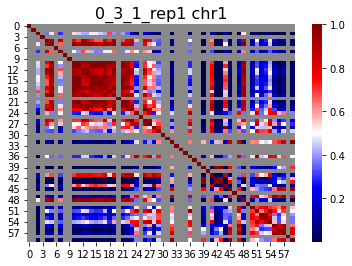

In [85]:
one_FISH_name='0_3_1_rep1'
chr_name='chr1'
one_array=ImputeHiFI.get_proximity_array(DNA_FISH_proxi_adata, one_FISH_name, chr_name,chr_bin_length_dic,set_min_limit=True,min_limit=0.001,set_max_limit=False,max_limit=1.0)
ImputeHiFI.plot_proximity(one_array,title=one_FISH_name+' '+chr_name)

### cell cell RMSD

In [86]:
importlib.reload(ImputeHiFI)
chr_name_list=first_seen_probe_data['chr_name_list']
cell_number=first_seen_probe_data['cell_number']
all_cell_dna_list=first_seen_probe_data['all_cell_dna_list']
cell_name_array=first_seen_probe_data['cell_name_array']
All_cell_RMSD_dict=ImputeHiFI.generate_cell_cell_RMSD.get_All_cell_RMSD_dict(chr_name_list,cell_number,all_cell_dna_list,
                               cell_name_array,kernerl_number=None)

v5 similar FISH


<module 'ImputeHiFI_Algorithm_v5' from '/mnt/disk1/scfan/program/image_project/Cai_21_bioRxiv_Process/ImputHiFi/ImputeHiFI_Algorithm_v5.py'>

chr1
chr1


  0%|          | 1/1143 [00:00<05:04,  3.75it/s]

chr2
chr2


  0%|          | 3/1143 [00:00<02:50,  6.68it/s]

chr3
chr3


  0%|          | 4/1143 [00:00<02:30,  7.56it/s]

chr4


  1%|          | 6/1143 [00:00<02:27,  7.69it/s]

chr4


  0%|          | 1/1143 [00:00<04:27,  4.28it/s]

chr5
chr5


  1%|          | 9/1143 [00:01<02:17,  8.27it/s]]

chr6
chr6


  0%|          | 1/1143 [00:00<04:29,  4.24it/s]]

chr7

  1%|          | 8/1143 [00:01<02:27,  7.69it/s]


chr7


  1%|▏         | 15/1143 [00:02<02:31,  7.47it/s]

chr8
chr8


  1%|          | 9/1143 [00:01<02:20,  8.05it/s]]

chr9
chr9


  1%|▏         | 16/1143 [00:02<02:17,  8.17it/s]

chr10
chr10


  2%|▏         | 23/1143 [00:02<02:12,  8.46it/s]

chr11


  1%|          | 10/1143 [00:01<02:22,  7.97it/s]

chr11


  1%|▏         | 15/1143 [00:01<02:15,  8.33it/s]

chr12
chr12


  1%|          | 12/1143 [00:01<02:22,  7.94it/s]

chr13
chr13

  0%|          | 1/1143 [00:00<05:36,  3.40it/s]

  2%|▏         | 20/1143 [00:02<02:15,  8.29it/s]

chr14

  3%|▎         | 31/1143 [00:03<02:12,  8.40it/s]


chr14


  0%|          | 3/1143 [00:00<03:20,  5.68it/s]]

chr15
chr15


  2%|▏         | 19/1143 [00:02<02:22,  7.88it/s]

chr16
chr16


  0%|          | 1/1143 [00:00<05:11,  3.67it/s]]

chr17
chr17


  1%|          | 10/1143 [00:01<02:27,  7.69it/s]

chr18
chr18


  1%|▏         | 17/1143 [00:02<02:25,  7.76it/s]

chr19


  1%|▏         | 15/1143 [00:02<02:24,  7.80it/s]

chr19


  1%|▏         | 15/1143 [00:02<02:23,  7.89it/s]

chrX
chrX


100%|██████████| 1143/1143 [01:24<00:00, 13.50it/s] 


Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result


In [87]:
first_seen_probe_data['All_cell_RMSD_dict']=All_cell_RMSD_dict

### cell cell RNA RMSD

In [90]:
importlib.reload(ImputeHiFI)
chr_name_list=first_seen_probe_data['chr_name_list']
cell_number=first_seen_probe_data['cell_number']
all_cell_dna_list=first_seen_probe_data['all_cell_dna_list']
cell_name_array=first_seen_probe_data['cell_name_array']
All_cell_RMSD_dict=first_seen_probe_data['All_cell_RMSD_dict']
All_cell_RNA_RMSD_dict=ImputeHiFI.generate_RNA_FISH_cell_cell_RMSD.get_RNA_FISH_cell_cell_RMSD_dict(RNA_FISH_adata,chr_name_list,cell_name_array,
                                         All_cell_RMSD_dict,kernerl_number=None)
first_seen_probe_data['All_cell_RNA_RMSD_dict']=All_cell_RNA_RMSD_dict

v5 similar FISH


<module 'ImputeHiFI_Algorithm_v5' from '/mnt/disk1/scfan/program/image_project/Cai_21_bioRxiv_Process/ImputHiFi/ImputeHiFI_Algorithm_v5.py'>

chr1


 14%|█▍        | 165/1143 [00:04<00:20, 46.70it/s]

chr2


 14%|█▍        | 159/1143 [00:03<00:20, 47.88it/s]

chr3


 14%|█▍        | 165/1143 [00:04<00:21, 46.49it/s]

chr4


 63%|██████▎   | 717/1143 [00:16<00:10, 40.87it/s]

chr5


 31%|███▏      | 359/1143 [00:07<00:14, 55.61it/s]

chr6


 62%|██████▏   | 714/1143 [00:16<00:10, 41.21it/s]]

chr7


 97%|█████████▋| 1108/1143 [00:24<00:00, 45.11it/s]

chr8


 15%|█▍        | 167/1143 [00:04<00:21, 45.81it/s]]

chr9


 53%|█████▎    | 608/1143 [00:13<00:13, 40.73it/s]

chr10


 22%|██▏       | 250/1143 [00:05<00:17, 51.95it/s]]

chr11

 58%|█████▊    | 667/1143 [00:14<00:11, 40.48it/s]

 17%|█▋        | 190/1143 [00:04<00:22, 41.56it/s]]

chr12


 97%|█████████▋| 1114/1143 [00:24<00:00, 44.01it/s]

chr13

 60%|██████    | 687/1143 [00:15<00:11, 39.07it/s]

 79%|███████▉  | 903/1143 [00:20<00:04, 53.14it/s]]

chr14


 73%|███████▎  | 838/1143 [00:19<00:07, 43.02it/s]]

chr15


 94%|█████████▍| 1074/1143 [00:23<00:01, 45.42it/s]

chr16


 55%|█████▍    | 627/1143 [00:13<00:12, 40.84it/s]]

chr17


 16%|█▌        | 179/1143 [00:04<00:24, 40.08it/s]]

chr18

 93%|█████████▎| 1058/1143 [00:23<00:01, 42.65it/s]

 92%|█████████▏| 1054/1143 [00:23<00:01, 46.88it/s]

chr19

 38%|███▊      | 437/1143 [00:09<00:14, 49.32it/s]

 40%|████      | 459/1143 [00:10<00:15, 43.64it/s]]

chrX


100%|██████████| 1143/1143 [00:27<00:00, 42.18it/s]


Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result


### generate linear impute result

In [103]:
first_seen_probe_data_path=os.path.join(first_seen_probe_data_dir,'first_seen_probe_data.pkl')
first_seen_probe_data=basic.load_variable_from_pikle_file(first_seen_probe_data_path)

In [104]:
cell_number=first_seen_probe_data['cell_number']
all_cell_dna_list=first_seen_probe_data['all_cell_dna_list']
chr_num=len(first_seen_probe_data['chr_name_list'])
Extriming_chr_list=[]

for chr_idx in tqdm(range(chr_num)):
    for cell_idx in range(cell_number):
        _zxys=all_cell_dna_list[cell_idx][chr_idx]
        probe_number = _zxys.shape[0]
        nan_ids = np.where(np.isnan(all_cell_dna_list[cell_idx][chr_idx][:,0]))[0]
        (continue_number_list, continue_start_ids) = FillNANBasic.FillNANMean.get_NAN_continue_info(nan_ids)
        _zxys_fill_NAN, extreaming_condition_1 = FillNANBasic.FillNANMean.fill_NAN_v1(_zxys,
                                                                                  continue_number_list,
                                                                                  continue_start_ids,
                                                                                  probe_number)
        if not extreaming_condition_1:
            Extriming_chr_list.append(_zxys_fill_NAN)
            break
Impute_dna_list=copy.deepcopy(all_cell_dna_list)
for cell_idx in tqdm(range(cell_number)):
    for chr_idx in range(chr_num):
        _zxys=all_cell_dna_list[cell_idx][chr_idx]
        probe_number = _zxys.shape[0]
        nan_ids = np.where(np.isnan(all_cell_dna_list[cell_idx][chr_idx][:,0]))[0]

        if (len(nan_ids) > 0):
            (continue_number_list, continue_start_ids) = FillNANBasic.FillNANMean.get_NAN_continue_info(nan_ids)

            _zxys_fill_NAN, extreaming_condition_1 = FillNANBasic.FillNANMean.fill_NAN_v1(_zxys,
                                                                                          continue_number_list,
                                                                                          continue_start_ids,
                                                                                          probe_number)
        else:
            _zxys_fill_NAN = _zxys
            extreaming_condition_1 = False
        if (extreaming_condition_1):
            _zxys_fill_NAN=Extriming_chr_list[chr_idx]
        Impute_dna_list[cell_idx][chr_idx]=_zxys_fill_NAN
first_seen_probe_data['Linear_all_cell_dna_list']=Impute_dna_list
first_seen_probe_data['Extriming_chr_list']=Extriming_chr_list

100%|██████████| 1143/1143 [00:02<00:00, 440.77it/s]


### store first seen probe data

In [105]:
first_seen_probe_data_path=os.path.join(first_seen_probe_data_dir,'first_seen_probe_data.pkl')
basic.store_variable_from_pikle_file(first_seen_probe_data_path,first_seen_probe_data)

In [94]:
first_seen_probe_data.keys()

dict_keys(['chrom_ids', 'region_names', 'start_position', 'end_position', 'mid_position', 'mid_position_Mb', 'dna_zxys', 'chrom_name', 'gene_ID', 'cluster_label', 'cluster_label_name', 'all_cell_dna_list', 'chrom_ids_to_index_dict', 'chrom_index_to_ids_dict', 'chr_name_list', 'cell_name_array', 'cell_name_list', 'each_chr_missing_rate_df', 'missing_rate_df', 'chr_bin_length_dic', 'cell_type_df', 'adata_obs_df', 'spaital_dist_suffix', 'prxoimtiy_score_suffix', 'cell_number', 'chr_cell_type_center_value_df', 'All_cell_RMSD_dict', 'All_cell_RNA_RMSD_dict', 'Linear_all_cell_dna_list', 'Extriming_chr_list'])

In [ ]:
first_seen_probe_data_path=os.path.join(first_seen_probe_data_dir,'first_seen_probe_data.pkl')
first_seen_probe_data=basic.load_variable_from_pikle_file(first_seen_probe_data_path)

## generate ImputeHiFI mode2 result

### proxi adata

In [205]:
FISH_RMSD_name='All_cell_RNA_RMSD_dict'
version = 'no_HiC_RNA_FISH_RMSD_not_use_mean_count'

first_seen_probe_data_path=os.path.join(first_seen_probe_data_dir,'first_seen_probe_data.pkl')
first_seen_probe_data=basic.load_variable_from_pikle_file(first_seen_probe_data_path)

chr_cell_type_center_value_df=first_seen_probe_data['chr_cell_type_center_value_df']
chr_name_list=first_seen_probe_data['chr_name_list']
cell_number=first_seen_probe_data['cell_number']
cell_name_list=first_seen_probe_data['cell_name_list'][0:5]
all_cell_dna_list=first_seen_probe_data['all_cell_dna_list']
chr_bin_length_dic=first_seen_probe_data['chr_bin_length_dic']
chrom_index_to_ids_dict=first_seen_probe_data['chrom_index_to_ids_dict']
adata_obs_df=first_seen_probe_data['adata_obs_df']
spaital_dist_suffix=first_seen_probe_data['spaital_dist_suffix']
prxoimtiy_score_suffix=first_seen_probe_data['prxoimtiy_score_suffix']
missing_rate_df=first_seen_probe_data['missing_rate_df']
FISH_nearest_neighbors_dic=first_seen_probe_data[FISH_RMSD_name]

store_path=os.path.join(first_seen_probe_data_dir,f'first_seen_probe_data_{prxoimtiy_score_suffix}.h5ad')
DNA_FISH_proxi_adata=sc.read(store_path)

In [223]:
importlib.reload(ImputeHiFI_no_HiC)
base_coef = 0.001
HiC_weight = 0
FISH_weight = 1
short_range_HiC_weight_bound = 0.0
long_range_HiC_weight_bound = 0.0
all_range_diag_sum_weight_HiC_bound = 0.0
short_range_diag = 0 
initial_guess = [HiC_weight, FISH_weight]
verbose = False
background_cell_num = 150
use_mean_count=0
para = ('bg_n' + str(background_cell_num) + '_sdn' + str(short_range_diag) + '_sd' + str(
    all_range_diag_sum_weight_HiC_bound) +
        '_sr' + str(short_range_HiC_weight_bound) + '_lr' + str(long_range_HiC_weight_bound))

store_path = os.path.join(ImputeHiFI_data_dir,str(version)+"_proximity_score_adata_"+str(para)+".h5ad")

ImputeHiFI_no_HiC.ImputeHiFi_mode2_mode3.get_Impute_proximity_score(DNA_FISH_proxi_adata,missing_rate_df,cell_name_list,chr_bin_length_dic,base_coef,HiC_weight,FISH_weight,initial_guess,
                                                                    short_range_HiC_weight_bound,long_range_HiC_weight_bound, all_range_diag_sum_weight_HiC_bound,
                                                                    short_range_diag, background_cell_num,use_mean_count,FISH_nearest_neighbors_dic,store_path,kernerl_number=1)

v6 similar FISH no HiC


<module 'ImputeHiFI_Algorithm_v6_no_HiC' from '/mnt/disk1/scfan/program/image_project/Cai_21_bioRxiv_Process/ImputHiFi/ImputeHiFI_Algorithm_v6_no_HiC.py'>

100%|██████████| 5/5 [00:52<00:00, 10.50s/it]


Collect result


In [224]:
store_path = os.path.join(ImputeHiFI_data_dir,str(version)+"_proximity_score_adata_"+str(para)+".h5ad")

ImputeHiFI_prox_adata=sc.read(store_path)

Only considering the two last: ['.0', '.h5ad'].
Only considering the two last: ['.0', '.h5ad'].


In [225]:
ImputeHiFI_prox_adata

AnnData object with n_obs × n_vars = 5 × 35400
    obs: 'cell_name', 'cell_type'
    uns: 'parameter'

### Impute 3D data

In [235]:
first_seen_probe_data.keys()

dict_keys(['chrom_ids', 'region_names', 'start_position', 'end_position', 'mid_position', 'mid_position_Mb', 'dna_zxys', 'chrom_name', 'gene_ID', 'cluster_label', 'cluster_label_name', 'each_chr_missing_rate_df', 'missing_rate_df', 'all_cell_dna_list', 'chrom_ids_to_index_dict', 'chr_name_list', 'chr_bin_len_dict', 'chrom_index_to_ids_dict', 'cell_type_df', 'chr_bin_length_dic', 'cell_num', 'adata_obs_df', 'spaital_dist_suffix', 'prxoimtiy_score_suffix', 'cell_number', 'chr_cell_type_center_value_df', 'cell_name_array', 'All_cell_RMSD_dict', 'All_cell_RNA_RMSD_dict', 'Linear_all_cell_dna_list', 'Extriming_chr_list'])

In [238]:
importlib.reload(ImputeHiFI)
store_path = os.path.join(ImputeHiFI_data_dir,str(version)+"_proximity_score_adata_"+str(para)+".h5ad")
ImputeHiFI_adata=sc.read(store_path)

chr_cell_type_center_value_df=first_seen_probe_data['chr_cell_type_center_value_df']
chr_name_list=first_seen_probe_data['chr_name_list']
cell_number=first_seen_probe_data['cell_number']
all_cell_dna_list=first_seen_probe_data['all_cell_dna_list']
chr_bin_length_dic=first_seen_probe_data['chr_bin_length_dic']
chrom_index_to_ids_dict=first_seen_probe_data['chrom_index_to_ids_dict']
chrom_ids_to_index_dict=first_seen_probe_data['chrom_ids_to_index_dict']
adata_obs_df=first_seen_probe_data['adata_obs_df']
spaital_dist_suffix=first_seen_probe_data['spaital_dist_suffix']
prxoimtiy_score_suffix=first_seen_probe_data['prxoimtiy_score_suffix']
Linear_impute_all_cell_dna_list=first_seen_probe_data['Linear_all_cell_dna_list']

infer_3D_type = r"_part_loci_pair_weight_"
loci_pair_type = 'no_diff'

store_path = os.path.join(ImputeHiFI_data_dir, version + str(para) +infer_3D_type+loci_pair_type+"_Impute_data.pkl")

finall_optimize_all_cell_dna_list,diff_genes=ImputeHiFI.generate_impute_dna_list.get_impute_dna_list(chr_bin_length_dic, chr_name_list,ImputeHiFI_adata, 
                                                        all_cell_dna_list,Linear_impute_all_cell_dna_list,
                                                        chr_cell_type_center_value_df, chrom_ids_to_index_dict, 
                                                        loci_pair_type,kernerl_number=None)

final_ImputeHiFI_data = copy.deepcopy(first_seen_probe_data)
final_ImputeHiFI_data['all_cell_dna_list'] = finall_optimize_all_cell_dna_list
final_ImputeHiFI_data['ledien_diff_gene'] = diff_genes

basic.store_variable_from_pikle_file(store_path,final_ImputeHiFI_data)

v5 similar FISH


<module 'ImputeHiFI_Algorithm_v5' from '/mnt/disk1/scfan/program/image_project/Cai_21_bioRxiv_Process/ImputHiFi/ImputeHiFI_Algorithm_v5.py'>

Only considering the two last: ['.0', '.h5ad'].
Only considering the two last: ['.0', '.h5ad'].
chr1


  0%|          | 0/5 [00:00<?, ?it/s]

chr2


 20%|██        | 1/5 [00:00<00:03,  1.07it/s]

chr3


 40%|████      | 2/5 [00:02<00:04,  1.53s/it]

chr4


 20%|██        | 1/5 [00:01<00:06,  1.73s/it]

chr5


 20%|██        | 1/5 [00:01<00:07,  1.79s/it]

chr6


 80%|████████  | 4/5 [00:06<00:01,  1.70s/it]

chr7


 80%|████████  | 4/5 [00:05<00:01,  1.41s/it]

chr8


100%|██████████| 5/5 [00:05<00:00,  1.14s/it]

chr9

 40%|████      | 2/5 [00:02<00:03,  1.22s/it]

chr10


 80%|████████  | 4/5 [00:05<00:01,  1.59s/it]

chr11


 60%|██████    | 3/5 [00:05<00:03,  1.81s/it]


chr12


 60%|██████    | 3/5 [00:04<00:02,  1.33s/it]

chr13


 20%|██        | 1/5 [00:01<00:07,  1.83s/it]

chr14


 80%|████████  | 4/5 [00:05<00:01,  1.50s/it]

chr15


 60%|██████    | 3/5 [00:05<00:03,  1.79s/it]

chr16


100%|██████████| 5/5 [00:07<00:00,  1.55s/it]


chr17


 60%|██████    | 3/5 [00:05<00:03,  1.78s/it]

chr18


  0%|          | 0/5 [00:00<?, ?it/s].63s/it]

chr19


 40%|████      | 2/5 [00:03<00:05,  1.80s/it]

chrX


100%|██████████| 5/5 [00:06<00:00,  1.32s/it]


Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result


### generate 3D spatial distance

In [ ]:
store_path = os.path.join(ImputeHiFI_data_dir, version + str(para) +infer_3D_type+loci_pair_type+"_Impute_data.pkl")

final_ImputeHiFI_data=basic.load_variable_from_pikle_file(store_path)

chr_name_list=first_seen_probe_data['chr_name_list']
cell_number=first_seen_probe_data['cell_number']
all_cell_dna_list=first_seen_probe_data['all_cell_dna_list']
chr_bin_length_dic=first_seen_probe_data['chr_bin_length_dic']
chrom_index_to_ids_dict=first_seen_probe_data['chrom_index_to_ids_dict']
adata_obs_df=first_seen_probe_data['adata_obs_df']
spaital_dist_suffix=first_seen_probe_data['spaital_dist_suffix']
prxoimtiy_score_suffix=first_seen_probe_data['prxoimtiy_score_suffix']

Impute_all_cell_dna_list=final_ImputeHiFI_data['all_cell_dna_list']


store_path=os.path.join(ImputeHiFI_data_dir, version + str(para) +infer_3D_type+loci_pair_type+f"_{spaital_dist_suffix}.h5ad")
                        
ImputeHiFI.generate_spatial_distance_h5ad.generate_spatial_h5ad(chr_name_list,5,Impute_all_cell_dna_list,
                              chr_bin_length_dic,chrom_index_to_ids_dict,adata_obs_df,store_path,)

store_path=os.path.join(ImputeHiFI_data_dir, version + str(para) +infer_3D_type+loci_pair_type+f"_{spaital_dist_suffix}.h5ad")
Impute_3D_spad_adata=sc.read(store_path)

### generate proximity score

In [247]:
importlib.reload(ImputeHiFI)
store_path=os.path.join(ImputeHiFI_data_dir, version + str(para) +infer_3D_type+loci_pair_type+f"_{spaital_dist_suffix}.h5ad")
Impute_3D_spad_adata=sc.read(store_path)

chr_cell_type_center_value_df=first_seen_probe_data['chr_cell_type_center_value_df']
chr_name_list=first_seen_probe_data['chr_name_list']
cell_number=first_seen_probe_data['cell_number']
all_cell_dna_list=first_seen_probe_data['all_cell_dna_list']
chr_bin_length_dic=first_seen_probe_data['chr_bin_length_dic']
chrom_index_to_ids_dict=first_seen_probe_data['chrom_index_to_ids_dict']
adata_obs_df=first_seen_probe_data['adata_obs_df']
spaital_dist_suffix=first_seen_probe_data['spaital_dist_suffix']
prxoimtiy_score_suffix=first_seen_probe_data['prxoimtiy_score_suffix']



store_path=os.path.join(ImputeHiFI_data_dir, version + str(para) +infer_3D_type+loci_pair_type+f"_{prxoimtiy_score_suffix}.h5ad")
ImputeHiFI.generate_proximity_score_h5ad.generate_proximity_h5ad(Impute_3D_spad_adata,chr_name_list,chr_cell_type_center_value_df,
                              chr_bin_length_dic, adata_obs_df, store_path,
                              kernerl_number=None)

Impute_3D_proxi_adata=sc.read(store_path)

v5 similar FISH


<module 'ImputeHiFI_Algorithm_v5' from '/mnt/disk1/scfan/program/image_project/Cai_21_bioRxiv_Process/ImputHiFi/ImputeHiFI_Algorithm_v5.py'>

Only considering the two last: ['.0_part_loci_pair_weight_no_diff_spatial_dist', '.h5ad'].
Only considering the two last: ['.0_part_loci_pair_weight_no_diff_spatial_dist', '.h5ad'].
chr1


0it [00:00, ?it/s]

chr2


0it [00:00, ?it/s]

chr3


0it [00:00, ?it/s]

chr4


0it [00:00, ?it/s]

chr5


5it [00:00, 44.52it/s]
0it [00:00, ?it/s]

chr6


5it [00:00, 44.66it/s]
4it [00:00, 37.58it/s]

chr7


5it [00:00, 38.94it/s]

chr8

5it [00:00, 43.42it/s]
0it [00:00, ?it/s]

chr9


0it [00:00, ?it/s]t/s]

chr10


5it [00:00, 39.16it/s]
5it [00:00, 43.40it/s]


chr11


0it [00:00, ?it/s]

chr12

5it [00:00, 41.87it/s]

5it [00:00, 41.29it/s]
5it [00:00, 38.85it/s]
4it [00:00, 35.50it/s]

chr13


5it [00:00, 36.27it/s]
5it [00:00, 43.94it/s]

chr14

5it [00:00, 43.31it/s]


0it [00:00, ?it/s]

chr15

5it [00:00, 42.70it/s]

5it [00:00, 42.05it/s]
0it [00:00, ?it/s]

chr16


5it [00:00, 43.90it/s]


chr17


0it [00:00, ?it/s]t/s]

chr18

5it [00:00, 38.89it/s]


5it [00:00, 44.76it/s]
0it [00:00, ?it/s]

chr19


0it [00:00, ?it/s]

chrX


5it [00:00, 36.34it/s]
5it [00:00, 36.15it/s]
5it [00:00, 41.20it/s]
5it [00:00, 44.02it/s]
5it [00:00, 45.76it/s]
5it [00:00, 47.10it/s]


Only considering the two last: ['.0_part_loci_pair_weight_no_diff_proximity_score', '.h5ad'].
Only considering the two last: ['.0_part_loci_pair_weight_no_diff_proximity_score', '.h5ad'].


## generate ImputeHiFI mode3 result

### proxi adata

In [205]:
FISH_RMSD_name='All_cell_RMSD_dict'
version = 'no_HiC_RNA_FISH_RMSD_not_use_mean_count'

first_seen_probe_data_path=os.path.join(first_seen_probe_data_dir,'first_seen_probe_data.pkl')
first_seen_probe_data=basic.load_variable_from_pikle_file(first_seen_probe_data_path)

chr_cell_type_center_value_df=first_seen_probe_data['chr_cell_type_center_value_df']
chr_name_list=first_seen_probe_data['chr_name_list']
cell_number=first_seen_probe_data['cell_number']
all_cell_dna_list=first_seen_probe_data['all_cell_dna_list']
chr_bin_length_dic=first_seen_probe_data['chr_bin_length_dic']
chrom_index_to_ids_dict=first_seen_probe_data['chrom_index_to_ids_dict']
adata_obs_df=first_seen_probe_data['adata_obs_df']
spaital_dist_suffix=first_seen_probe_data['spaital_dist_suffix']
prxoimtiy_score_suffix=first_seen_probe_data['prxoimtiy_score_suffix']
missing_rate_df=first_seen_probe_data['missing_rate_df']
FISH_nearest_neighbors_dic=first_seen_probe_data[FISH_RMSD_name]

store_path=os.path.join(first_seen_probe_data_dir,f'first_seen_probe_data_{prxoimtiy_score_suffix}.h5ad')
DNA_FISH_proxi_adata=sc.read(store_path)

In [223]:
importlib.reload(ImputeHiFI_no_HiC)
base_coef = 0.001
HiC_weight = 0
FISH_weight = 1
short_range_HiC_weight_bound = 0.0
long_range_HiC_weight_bound = 0.0
all_range_diag_sum_weight_HiC_bound = 0.0
short_range_diag = 0 
initial_guess = [HiC_weight, FISH_weight]
verbose = False
background_cell_num = 150
use_mean_count=0
para = ('bg_n' + str(background_cell_num) + '_sdn' + str(short_range_diag) + '_sd' + str(
    all_range_diag_sum_weight_HiC_bound) +
        '_sr' + str(short_range_HiC_weight_bound) + '_lr' + str(long_range_HiC_weight_bound))

store_path = os.path.join(ImputeHiFI_data_dir,str(version)+"_proximity_score_adata_"+str(para)+".h5ad")

ImputeHiFI_no_HiC.ImputeHiFi_mode2_mode3.get_Impute_proximity_score(DNA_FISH_proxi_adata,missing_rate_df,cell_name_list,chr_bin_length_dic,base_coef,HiC_weight,FISH_weight,initial_guess,
                                                                    short_range_HiC_weight_bound,long_range_HiC_weight_bound, all_range_diag_sum_weight_HiC_bound,
                                                                    short_range_diag, background_cell_num,use_mean_count,FISH_nearest_neighbors_dic,store_path,kernerl_number=1)

v6 similar FISH no HiC


<module 'ImputeHiFI_Algorithm_v6_no_HiC' from '/mnt/disk1/scfan/program/image_project/Cai_21_bioRxiv_Process/ImputHiFi/ImputeHiFI_Algorithm_v6_no_HiC.py'>

100%|██████████| 5/5 [00:52<00:00, 10.50s/it]


Collect result


In [224]:
store_path = os.path.join(ImputeHiFI_data_dir,str(version)+"_proximity_score_adata_"+str(para)+".h5ad")

ImputeHiFI_prox_adata=sc.read(store_path)

Only considering the two last: ['.0', '.h5ad'].
Only considering the two last: ['.0', '.h5ad'].


In [225]:
ImputeHiFI_prox_adata

AnnData object with n_obs × n_vars = 5 × 35400
    obs: 'cell_name', 'cell_type'
    uns: 'parameter'

### Impute 3D data

In [235]:
first_seen_probe_data.keys()

dict_keys(['chrom_ids', 'region_names', 'start_position', 'end_position', 'mid_position', 'mid_position_Mb', 'dna_zxys', 'chrom_name', 'gene_ID', 'cluster_label', 'cluster_label_name', 'each_chr_missing_rate_df', 'missing_rate_df', 'all_cell_dna_list', 'chrom_ids_to_index_dict', 'chr_name_list', 'chr_bin_len_dict', 'chrom_index_to_ids_dict', 'cell_type_df', 'chr_bin_length_dic', 'cell_num', 'adata_obs_df', 'spaital_dist_suffix', 'prxoimtiy_score_suffix', 'cell_number', 'chr_cell_type_center_value_df', 'cell_name_array', 'All_cell_RMSD_dict', 'All_cell_RNA_RMSD_dict', 'Linear_all_cell_dna_list', 'Extriming_chr_list'])

In [238]:
importlib.reload(ImputeHiFI)
store_path = os.path.join(ImputeHiFI_data_dir,str(version)+"_proximity_score_adata_"+str(para)+".h5ad")
ImputeHiFI_adata=sc.read(store_path)

chr_cell_type_center_value_df=first_seen_probe_data['chr_cell_type_center_value_df']
chr_name_list=first_seen_probe_data['chr_name_list']
cell_number=first_seen_probe_data['cell_number']
all_cell_dna_list=first_seen_probe_data['all_cell_dna_list']
chr_bin_length_dic=first_seen_probe_data['chr_bin_length_dic']
chrom_index_to_ids_dict=first_seen_probe_data['chrom_index_to_ids_dict']
chrom_ids_to_index_dict=first_seen_probe_data['chrom_ids_to_index_dict']
adata_obs_df=first_seen_probe_data['adata_obs_df']
spaital_dist_suffix=first_seen_probe_data['spaital_dist_suffix']
prxoimtiy_score_suffix=first_seen_probe_data['prxoimtiy_score_suffix']
Linear_impute_all_cell_dna_list=first_seen_probe_data['Linear_all_cell_dna_list']

infer_3D_type = r"_part_loci_pair_weight_"
loci_pair_type = 'no_diff'

store_path = os.path.join(ImputeHiFI_data_dir, version + str(para) +infer_3D_type+loci_pair_type+"_Impute_data.pkl")

finall_optimize_all_cell_dna_list,diff_genes=ImputeHiFI.generate_impute_dna_list.get_impute_dna_list(chr_bin_length_dic, chr_name_list,ImputeHiFI_adata, 
                                                        all_cell_dna_list,Linear_impute_all_cell_dna_list,
                                                        chr_cell_type_center_value_df, chrom_ids_to_index_dict, 
                                                        loci_pair_type,kernerl_number=None)

final_ImputeHiFI_data = copy.deepcopy(first_seen_probe_data)
final_ImputeHiFI_data['all_cell_dna_list'] = finall_optimize_all_cell_dna_list
final_ImputeHiFI_data['ledien_diff_gene'] = diff_genes

basic.store_variable_from_pikle_file(store_path,final_ImputeHiFI_data)

v5 similar FISH


<module 'ImputeHiFI_Algorithm_v5' from '/mnt/disk1/scfan/program/image_project/Cai_21_bioRxiv_Process/ImputHiFi/ImputeHiFI_Algorithm_v5.py'>

Only considering the two last: ['.0', '.h5ad'].
Only considering the two last: ['.0', '.h5ad'].
chr1


  0%|          | 0/5 [00:00<?, ?it/s]

chr2


 20%|██        | 1/5 [00:00<00:03,  1.07it/s]

chr3


 40%|████      | 2/5 [00:02<00:04,  1.53s/it]

chr4


 20%|██        | 1/5 [00:01<00:06,  1.73s/it]

chr5


 20%|██        | 1/5 [00:01<00:07,  1.79s/it]

chr6


 80%|████████  | 4/5 [00:06<00:01,  1.70s/it]

chr7


 80%|████████  | 4/5 [00:05<00:01,  1.41s/it]

chr8


100%|██████████| 5/5 [00:05<00:00,  1.14s/it]

chr9

 40%|████      | 2/5 [00:02<00:03,  1.22s/it]

chr10


 80%|████████  | 4/5 [00:05<00:01,  1.59s/it]

chr11


 60%|██████    | 3/5 [00:05<00:03,  1.81s/it]


chr12


 60%|██████    | 3/5 [00:04<00:02,  1.33s/it]

chr13


 20%|██        | 1/5 [00:01<00:07,  1.83s/it]

chr14


 80%|████████  | 4/5 [00:05<00:01,  1.50s/it]

chr15


 60%|██████    | 3/5 [00:05<00:03,  1.79s/it]

chr16


100%|██████████| 5/5 [00:07<00:00,  1.55s/it]


chr17


 60%|██████    | 3/5 [00:05<00:03,  1.78s/it]

chr18


  0%|          | 0/5 [00:00<?, ?it/s].63s/it]

chr19


 40%|████      | 2/5 [00:03<00:05,  1.80s/it]

chrX


100%|██████████| 5/5 [00:06<00:00,  1.32s/it]


Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result
Collect result


### generate 3D spatial distance

In [ ]:
store_path = os.path.join(ImputeHiFI_data_dir, version + str(para) +infer_3D_type+loci_pair_type+"_Impute_data.pkl")

final_ImputeHiFI_data=basic.load_variable_from_pikle_file(store_path)

chr_name_list=first_seen_probe_data['chr_name_list']
cell_number=first_seen_probe_data['cell_number']
all_cell_dna_list=first_seen_probe_data['all_cell_dna_list']
chr_bin_length_dic=first_seen_probe_data['chr_bin_length_dic']
chrom_index_to_ids_dict=first_seen_probe_data['chrom_index_to_ids_dict']
adata_obs_df=first_seen_probe_data['adata_obs_df']
spaital_dist_suffix=first_seen_probe_data['spaital_dist_suffix']
prxoimtiy_score_suffix=first_seen_probe_data['prxoimtiy_score_suffix']

Impute_all_cell_dna_list=final_ImputeHiFI_data['all_cell_dna_list']


store_path=os.path.join(ImputeHiFI_data_dir, version + str(para) +infer_3D_type+loci_pair_type+f"_{spaital_dist_suffix}.h5ad")
                        
ImputeHiFI.generate_spatial_distance_h5ad.generate_spatial_h5ad(chr_name_list,5,Impute_all_cell_dna_list,
                              chr_bin_length_dic,chrom_index_to_ids_dict,adata_obs_df,store_path,)

store_path=os.path.join(ImputeHiFI_data_dir, version + str(para) +infer_3D_type+loci_pair_type+f"_{spaital_dist_suffix}.h5ad")
Impute_3D_spad_adata=sc.read(store_path)

### generate proximity score

In [247]:
importlib.reload(ImputeHiFI)
store_path=os.path.join(ImputeHiFI_data_dir, version + str(para) +infer_3D_type+loci_pair_type+f"_{spaital_dist_suffix}.h5ad")
Impute_3D_spad_adata=sc.read(store_path)

chr_cell_type_center_value_df=first_seen_probe_data['chr_cell_type_center_value_df']
chr_name_list=first_seen_probe_data['chr_name_list']
cell_number=first_seen_probe_data['cell_number']
all_cell_dna_list=first_seen_probe_data['all_cell_dna_list']
chr_bin_length_dic=first_seen_probe_data['chr_bin_length_dic']
chrom_index_to_ids_dict=first_seen_probe_data['chrom_index_to_ids_dict']
adata_obs_df=first_seen_probe_data['adata_obs_df']
spaital_dist_suffix=first_seen_probe_data['spaital_dist_suffix']
prxoimtiy_score_suffix=first_seen_probe_data['prxoimtiy_score_suffix']



store_path=os.path.join(ImputeHiFI_data_dir, version + str(para) +infer_3D_type+loci_pair_type+f"_{prxoimtiy_score_suffix}.h5ad")
ImputeHiFI.generate_proximity_score_h5ad.generate_proximity_h5ad(Impute_3D_spad_adata,chr_name_list,chr_cell_type_center_value_df,
                              chr_bin_length_dic, adata_obs_df, store_path,
                              kernerl_number=None)

Impute_3D_proxi_adata=sc.read(store_path)

v5 similar FISH


<module 'ImputeHiFI_Algorithm_v5' from '/mnt/disk1/scfan/program/image_project/Cai_21_bioRxiv_Process/ImputHiFi/ImputeHiFI_Algorithm_v5.py'>

Only considering the two last: ['.0_part_loci_pair_weight_no_diff_spatial_dist', '.h5ad'].
Only considering the two last: ['.0_part_loci_pair_weight_no_diff_spatial_dist', '.h5ad'].
chr1


0it [00:00, ?it/s]

chr2


0it [00:00, ?it/s]

chr3


0it [00:00, ?it/s]

chr4


0it [00:00, ?it/s]

chr5


5it [00:00, 44.52it/s]
0it [00:00, ?it/s]

chr6


5it [00:00, 44.66it/s]
4it [00:00, 37.58it/s]

chr7


5it [00:00, 38.94it/s]

chr8

5it [00:00, 43.42it/s]
0it [00:00, ?it/s]

chr9


0it [00:00, ?it/s]t/s]

chr10


5it [00:00, 39.16it/s]
5it [00:00, 43.40it/s]


chr11


0it [00:00, ?it/s]

chr12

5it [00:00, 41.87it/s]

5it [00:00, 41.29it/s]
5it [00:00, 38.85it/s]
4it [00:00, 35.50it/s]

chr13


5it [00:00, 36.27it/s]
5it [00:00, 43.94it/s]

chr14

5it [00:00, 43.31it/s]


0it [00:00, ?it/s]

chr15

5it [00:00, 42.70it/s]

5it [00:00, 42.05it/s]
0it [00:00, ?it/s]

chr16


5it [00:00, 43.90it/s]


chr17


0it [00:00, ?it/s]t/s]

chr18

5it [00:00, 38.89it/s]


5it [00:00, 44.76it/s]
0it [00:00, ?it/s]

chr19


0it [00:00, ?it/s]

chrX


5it [00:00, 36.34it/s]
5it [00:00, 36.15it/s]
5it [00:00, 41.20it/s]
5it [00:00, 44.02it/s]
5it [00:00, 45.76it/s]
5it [00:00, 47.10it/s]


Only considering the two last: ['.0_part_loci_pair_weight_no_diff_proximity_score', '.h5ad'].
Only considering the two last: ['.0_part_loci_pair_weight_no_diff_proximity_score', '.h5ad'].
